In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from netCDF4 import Dataset
import xarray as xr

# Data

In [2]:
nc = Dataset('./ERA5_Qs_monthly_2018_2020.nc', 'r')
ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))
ds

<xarray.Dataset>
Dimensions:     (longitude: 1440, latitude: 721, time: 36)
Coordinates:
  * longitude   (longitude) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time        (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2020-12-01
Data variables:
    lsm         (time, latitude, longitude) float32 ...
    msdrswrf    (time, latitude, longitude) float32 ...
    msdrswrfcs  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-22 01:05:29 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

# Land mask

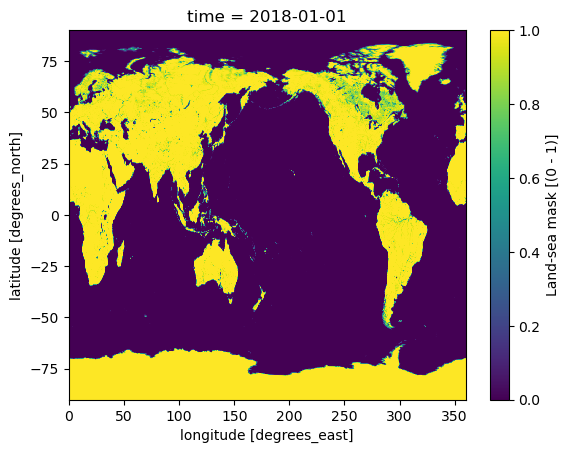

In [3]:
lsm = ds.data_vars['lsm']
lsm[0].plot()

# Calculate statistics

In [4]:
qs = ds.data_vars['msdrswrfcs'].where(lsm==0) # masking land
qs_= ds.data_vars['msdrswrf'].where(lsm==0) # masking land

qs_mean = qs.mean('longitude', skipna=True)
qs_mean_= qs_.mean('longitude', skipna=True)

qs_monthly_mean = qs_mean.groupby("time.month").mean("time")
qs_monthly_mean_= qs_mean_.groupby("time.month").mean("time")

print(qs_monthly_mean.month.values)
print(qs_monthly_mean.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
(12, 721)


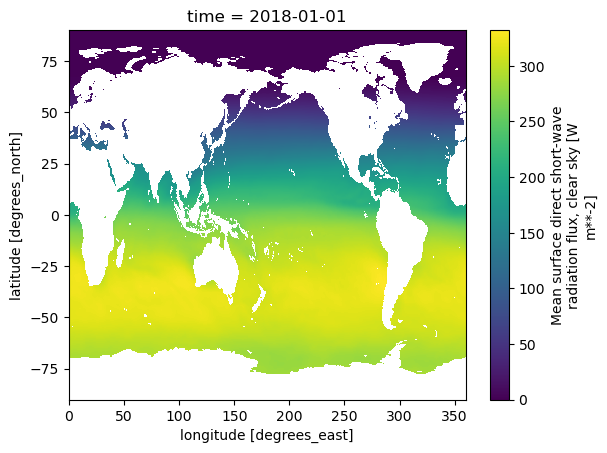

In [5]:
# check masking
qs[0].plot()

# Month-Latitude plot 

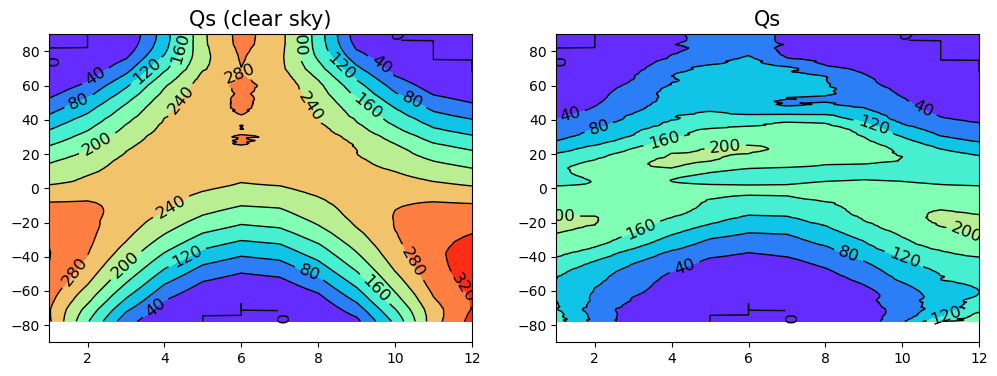

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))

titles = ['Qs (clear sky)', 'Qs'] 
for i, (var, title) in enumerate(zip([qs_monthly_mean, qs_monthly_mean_], titles)):
    ax[i].contourf(var.month, var.latitude,  var.T, levels=np.arange(0,400,40), cmap='rainbow')
    CS = ax[i].contour(var.month, var.latitude, var.T, 
                       levels=np.arange(0,400,40), colors='black', linewidths=1, linestyles='solid')
    ax[i].clabel(CS, fontsize=12, inline=1, fmt='%1.0f')
    ax[i].set_title(title, fontsize=15)

plt.show()